In [28]:
#Autor: Alma
import pandas as pd
from datetime import datetime
import time

pd.set_option("expand_frame_repr", False)
df_gfi = pd.read_csv('gfi_coll.csv',usecols=['created_at','repository_url'])
df_other_iss= pd.read_csv('otheri_coll.csv',usecols=['created_at','repository_url'])
df_all_iss= pd.read_csv('all_issues_fin.csv',usecols=['created_at','repository_url'])
df_contri_rep= pd.read_csv('contri_rep.csv',usecols=['url'])
df_all_rep= pd.read_csv('all_rep.csv',usecols=['stargazers_count','url'])
df_gfi['created_at'] = pd.to_datetime(df_gfi['created_at'])
df_other_iss['created_at'] = pd.to_datetime(df_other_iss['created_at'])
df_all_iss['created_at'] = pd.to_datetime(df_all_iss['created_at'])

# print(df_all_iss.sort_values(by=['created_at']).head(20))
print(df_contri_rep.shape)

(1114, 1)


In [29]:
import numpy as np
# first_issues_count = df_gfi.groupby('repository_url').agg(total_first = pd.NamedAgg('repository_url',aggfunc='count'))
cont_detail = pd.merge(left=df_contri_rep,right=df_all_rep, how="inner",left_on='url',right_on='url')
cont_detail = cont_detail.reindex(sorted(cont_detail.columns), axis=1)
print(cont_detail)

      stargazers_count                                                url
0               163824  https://api.github.com/repos/tensorflow/tensor...
1               100990     https://api.github.com/repos/electron/electron
2                81937    https://api.github.com/repos/microsoft/terminal
3                62792       https://api.github.com/repos/bitcoin/bitcoin
4                60495         https://api.github.com/repos/opencv/opencv
...                ...                                                ...
1139              2262       https://api.github.com/repos/Rudloff/alltube
1140              2262      https://api.github.com/repos/php/php-langspec
1141              2240       https://api.github.com/repos/beberlei/assert
1142              2240  https://api.github.com/repos/lexik/LexikJWTAut...
1143              2228       https://api.github.com/repos/drush-ops/drush

[1144 rows x 2 columns]


In [50]:
df_all_iss_unique = pd.DataFrame(df_gfi['repository_url'].unique(), columns=['url'])
print(df_all_iss_unique.shape)
ratio=[]

for i, g  in cont_detail.groupby(np.arange(len(cont_detail)) // 40):
    # print(g)
    gfi_rep = pd.merge(left=g,right=df_all_iss_unique, how="inner",left_on='url',right_on='url')    
    # print(i,gfi_rep.shape[0]/40 )
    if(i==16):
        gr = g
    ratio.append(gfi_rep.shape[0]/40)

# print(cont_detail.groupby(np.arange(len(cont_detail)) // 40).iloc[16])
# for index, row in df_all_iss_unique.head(40).iterrows():
#     gfi_rep = pd.merge(left=cont_detail,right=df_all_iss_unique, how="inner",left_on='url',right_on='url')    
#     ratio.append(gfi_rep.shape[0])

# print(ratio)
# print(ratio[0:19])
gr.to_csv('outlier.txt', index=False)  



(463, 1)


29


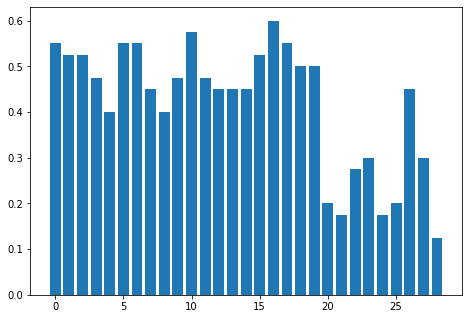

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# students = ratio[0:19]
print(len(ratio))
x= range(0,len(ratio))

ax.bar(x,ratio)
plt.show()

